<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sbu-logo.svg/1200px-Sbu-logo.svg.png" width="600" height="600">
</div>

<h1 align="center"> Digital Image Processing</h1>
<h2 align="center">Section 4: Edge Detection and Texture Synthesis</h2>
<h5 align="center">Mobin Nesari</h5>

## Import Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io, util
import heapq

## First Task

### Implementation

The function `edge_detection` performs edge detection on a provided image using the Canny edge detection algorithm. The input argument `img` is the source image in grayscale format. The function uses the Canny function of the OpenCV library, with threshold values of 100 and 200, to detect edges in the image. The resulting edges are then returned by the function as a binary image with white pixels indicating the detected edges, and black pixels representing the background. Overall, this function can be used in various computer vision applications that require the extraction of edges from an image.

In [3]:
def edge_detection(img):
    # Perform Canny edge detection on grayscale image
    edges = cv2.Canny(img, 100, 200)
    return edges

The function `image_binarization` performs binarization on a provided grayscale image. The input argument `img` is the source image in grayscale format. The function uses the `cv2.threshold()` function from OpenCV library to convert the grayscale image into a binary image. The function applies a threshold value of 127 to all pixel values of the input image, and any pixel value above this threshold is set to 255 (white), while any pixel value below it is set to 0 (black). 

The `threshold()` function returns two values - the first value `ret` is the calculated threshold value, which is not used in this function's implementation. The second returned value `binary_image` is the resulting binary image after applying the thresholding operation. Finally, the function returns this binary image as output.

In [4]:
def image_binarization(img):
    # Perform binary thresholding on grayscale image
    ret, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return binary_image

The function `hole_filling` performs hole filling on a provided binary image. The input argument `img` is the source binary image, where black pixels represent background and white pixels represent foreground objects. 

The function uses morphological closing operation to fill holes in the binary image. To perform the closing operation, the function first creates a structuring element by calling `cv2.getStructuringElement()` function. In this case, an elliptical shaped kernel of size 5x5 pixels is created. Then, the function applies the morphological closing operation to the binary image using the `cv2.morphologyEx()` function with the `cv2.MORPH_CLOSE` flag and the previously created kernel. 

The closing operation consists of two steps: dilation followed by erosion. It helps to close small gaps or holes between the foreground object's boundaries. The resulting image after the closing operation is then returned by the function as `closed_img`. This image should have fewer holes than the original binary image.

In [5]:
def hole_filling(img):
    # Perform morphological closing to fill holes in binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return closed_img

The function `log_edge_detection` performs edge detection on a provided image using the Laplacian of Gaussian (LoG) filter. The input argument `img` is the source image in grayscale format. 

The function first applies the Laplacian filter on the image `img` using the `cv2.Laplacian()` function from OpenCV library. The output of this operation is stored in the variable `log_filter`. This filter helps to find edges, as it enhances areas of rapid intensity changes or discontinuities in the image.

Next, the function applies a Gaussian blur with kernel size (3,3) and sigma value of 1.4 to smooth out the noise present in the `log_filter` image. This step improves the accuracy of edge detection by reducing false positives.

Finally, the function applies thresholding to the smoothed image using `cv2.threshold()` function. Any pixel value above the threshold value of 25 is set to 255 (white), while any pixel value below it is set to 0 (black). The resulting binary image after applying the threshold is returned as `edges`.

In [64]:
def log_edge_detection(img):
    # Apply the Laplacian of Gaussian filter with sigma=1.4
    log_filter = cv2.Laplacian(img, cv2.CV_64F)
    log_filter = cv2.GaussianBlur(log_filter, (3, 3), 1.4)
    edges = cv2.threshold(log_filter, 25, 255, cv2.THRESH_BINARY)[1]
    return edges

Load all test images

In [32]:
image1 = cv2.imread("gray1.jpeg")
image2 = cv2.imread("gray2.png")
image3 = cv2.imread("bin1.png")
image4 = cv2.imread("bin2.png")
lena_image = cv2.imread("lena.tif")

edges1 = edge_detection(image1)
edges2 = edge_detection(image2)
edges3 = edge_detection(image3)
edges4 = edge_detection(image4)
lena_edges = edge_detection(lena_image)

bin1 = image_binarization(image1)
bin2 = image_binarization(image2)
bin3 = image_binarization(image3)
bin4 = image_binarization(image4)
lena_bin = image_binarization(lena_image)

hole1 = hole_filling(image1)
hole2 = hole_filling(image2)
hole3 = hole_filling(image3)
hole4 = hole_filling(image4)
lena_h = hole_filling(lena_image)

### Test 1
Gray-scale image 1

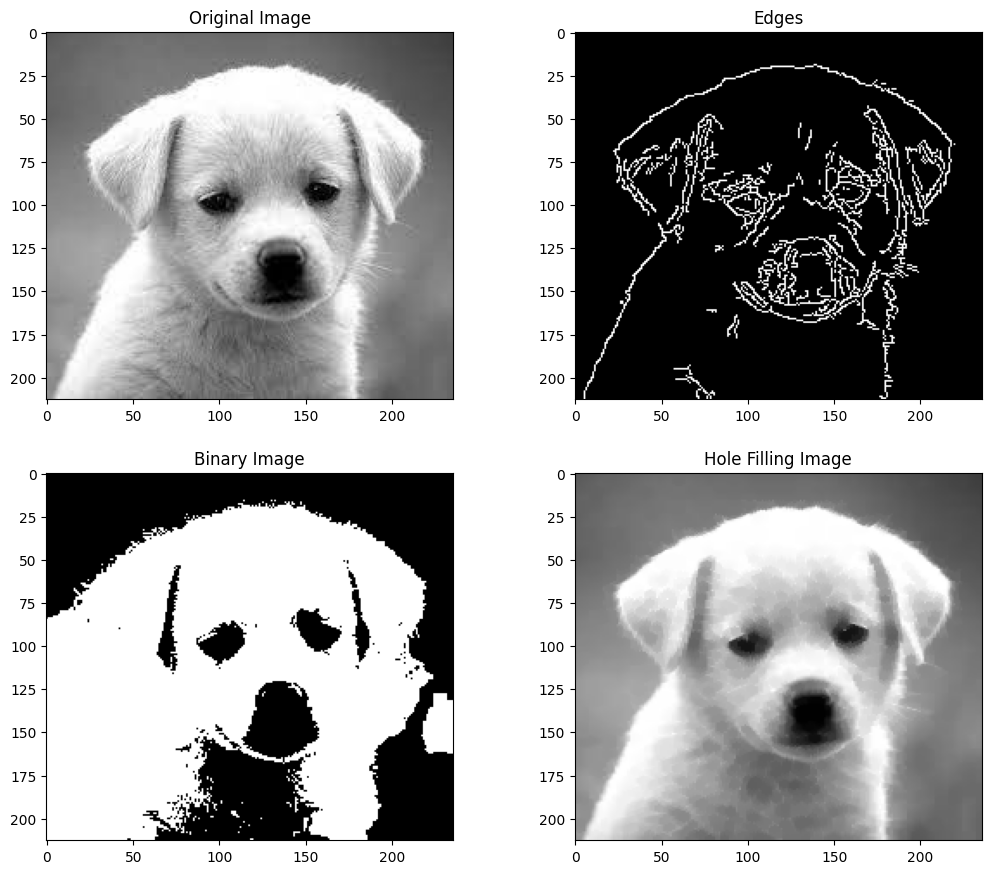

In [63]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)


axs[0][0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axs[0][0].title.set_text("Original Image")

axs[0][1].imshow(cv2.cvtColor(edges1, cv2.COLOR_BGR2RGB))
axs[0][1].title.set_text("Edges")

axs[1][0].imshow(cv2.cvtColor(bin1, cv2.COLOR_BGR2RGB))
axs[1][0].title.set_text("Binary Image")

axs[1][1].imshow(cv2.cvtColor(hole1, cv2.COLOR_BGR2RGB))
axs[1][1].title.set_text("Hole Filling Image")

plt.show()

### Test 2
Gray-scale image 2

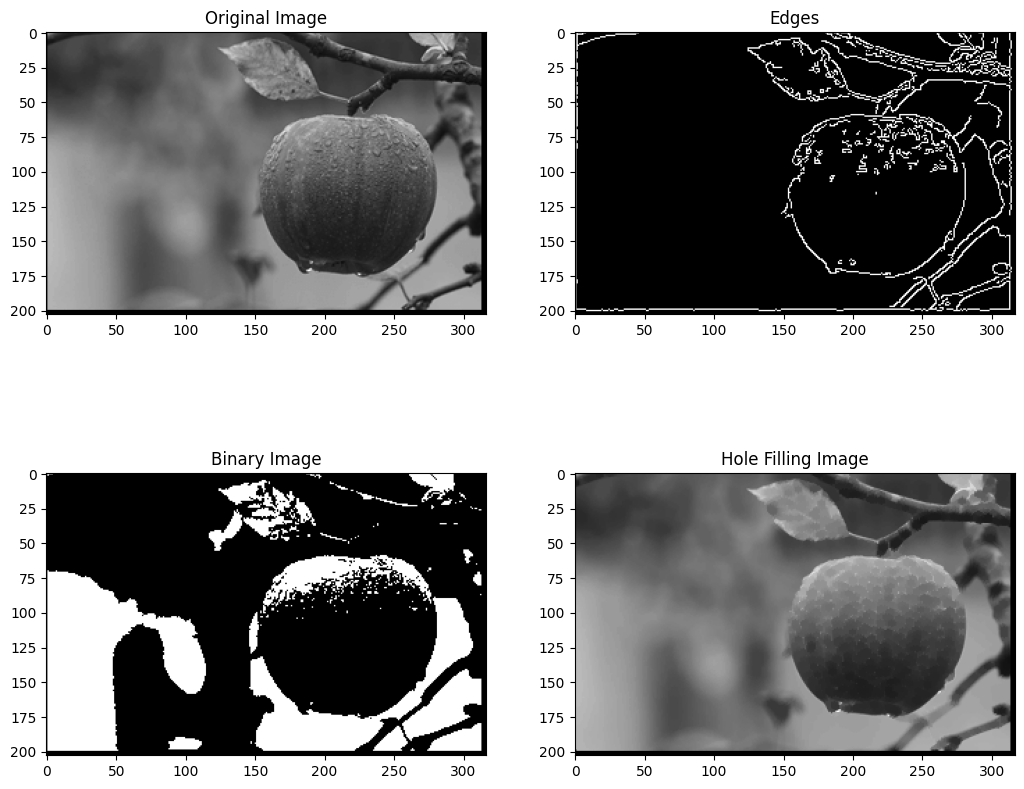

In [62]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axs[0][0].title.set_text("Original Image")

axs[0][1].imshow(cv2.cvtColor(edges2, cv2.COLOR_BGR2RGB))
axs[0][1].title.set_text("Edges")

axs[1][0].imshow(cv2.cvtColor(bin2, cv2.COLOR_BGR2RGB))
axs[1][0].title.set_text("Binary Image")

axs[1][1].imshow(cv2.cvtColor(hole2, cv2.COLOR_BGR2RGB))
axs[1][1].title.set_text("Hole Filling Image")

plt.show()

### Test 3
Binary image 1

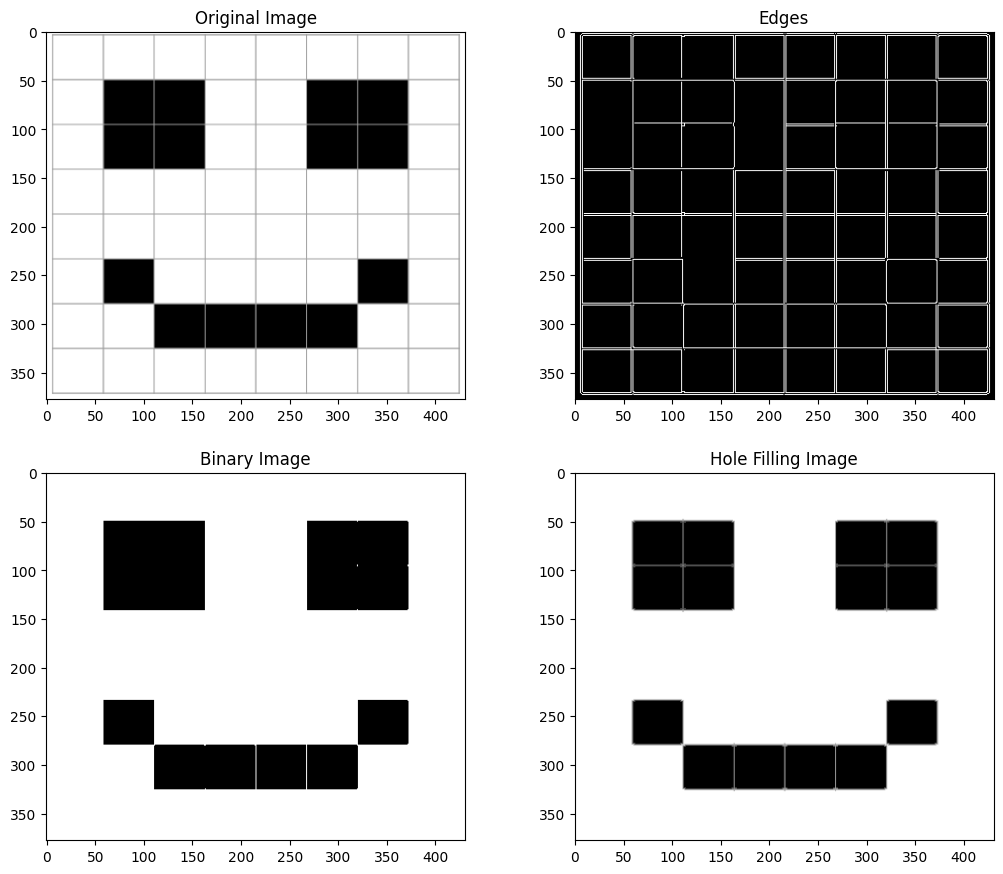

In [61]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axs[0][0].title.set_text("Original Image")

axs[0][1].imshow(cv2.cvtColor(edges3, cv2.COLOR_BGR2RGB))
axs[0][1].title.set_text("Edges")

axs[1][0].imshow(cv2.cvtColor(bin3, cv2.COLOR_BGR2RGB))
axs[1][0].title.set_text("Binary Image")

axs[1][1].imshow(cv2.cvtColor(hole3, cv2.COLOR_BGR2RGB))
axs[1][1].title.set_text("Hole Filling Image")

plt.show()

### Test 4
Binary image 2

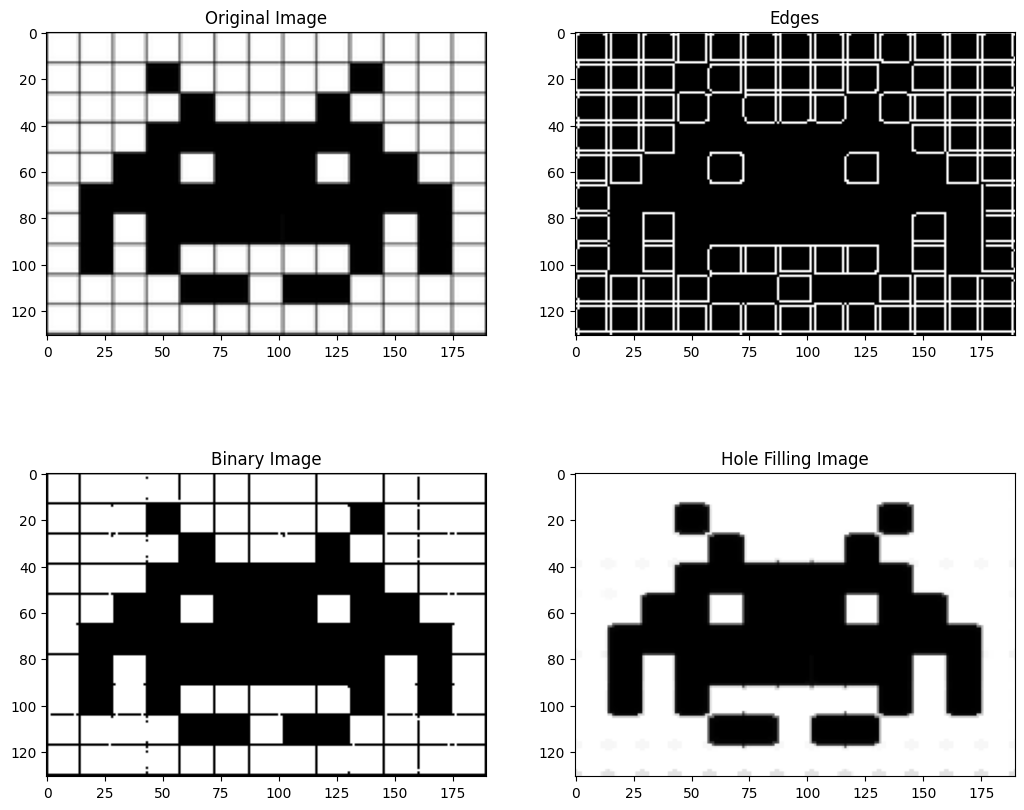

In [60]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
axs[0][0].title.set_text("Original Image")

axs[0][1].imshow(cv2.cvtColor(edges4, cv2.COLOR_BGR2RGB))
axs[0][1].title.set_text("Edges")

axs[1][0].imshow(cv2.cvtColor(bin4, cv2.COLOR_BGR2RGB))
axs[1][0].title.set_text("Binary Image")

axs[1][1].imshow(cv2.cvtColor(hole4, cv2.COLOR_BGR2RGB))
axs[1][1].title.set_text("Hole Filling Image")

plt.show()

### Test 5
Lena image

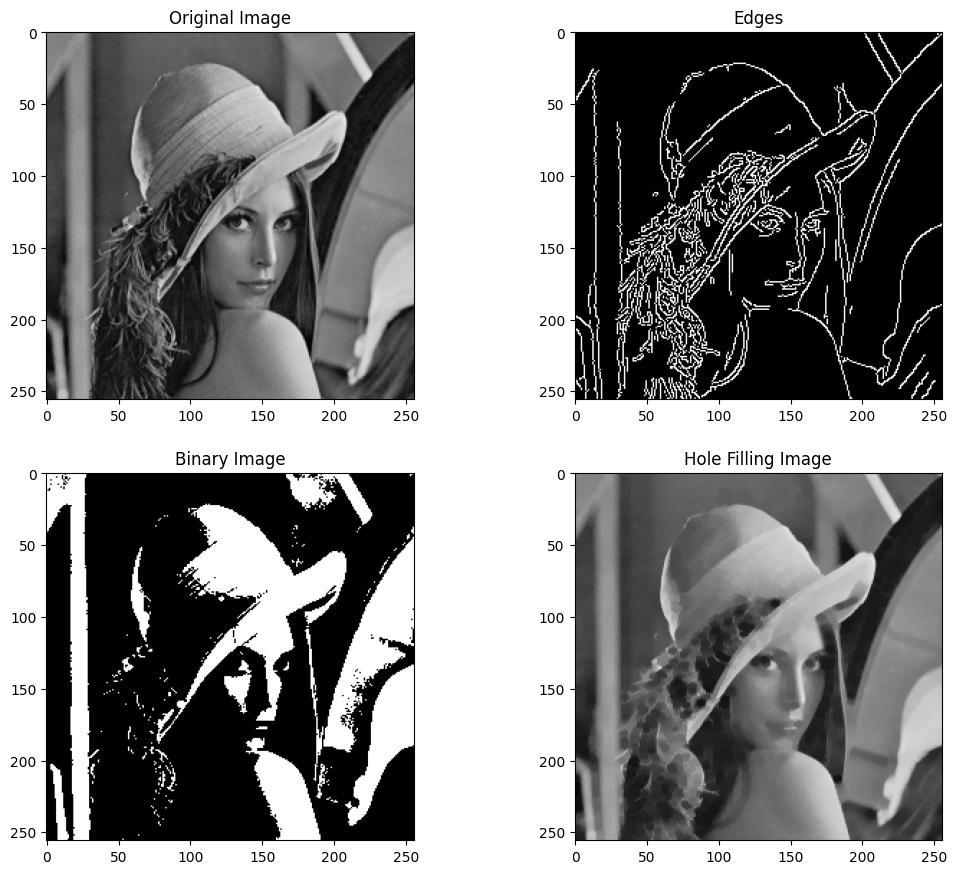

In [59]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(cv2.cvtColor(lena_image, cv2.COLOR_BGR2RGB))
axs[0][0].title.set_text("Original Image")

axs[0][1].imshow(cv2.cvtColor(lena_edges, cv2.COLOR_BGR2RGB))
axs[0][1].title.set_text("Edges")

axs[1][0].imshow(cv2.cvtColor(lena_bin, cv2.COLOR_BGR2RGB))
axs[1][0].title.set_text("Binary Image")

axs[1][1].imshow(cv2.cvtColor(lena_h, cv2.COLOR_BGR2RGB))
axs[1][1].title.set_text("Hole Filling Image")

plt.show()

### Test 6
Comparison between Canny edge detection and Log filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


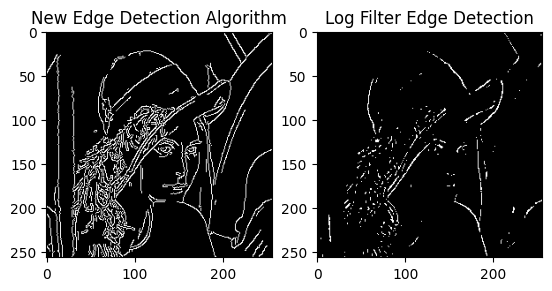

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(cv2.cvtColor(lena_edges, cv2.COLOR_BGR2RGB))
ax1.title.set_text("New Edge Detection Algorithm")

ax2.imshow(log_edge_detection(lena_image))
ax2.title.set_text("Log Filter Edge Detection")

plt.show()

__Conclusion:__ 

As you can see in above plot, Canny edge detection is more precise in detecting edges of lena sample image and offers promising results in edge detection. 

Canny edge detection is often considered better than the Laplacian of Gaussian (LoG) filter for edge detection due to several reasons. Firstly, the Canny edge detector provides more accurate localization and detection of edges. This is because it uses a multi-stage process that involves smoothing, gradient calculation, non-maximum suppression, and hysteresis thresholding. The LoG filter, on the other hand, relies solely on convolution with a Gaussian kernel followed by Laplacian operator, which can lead to false positives and inaccuracies.

Secondly, the Canny edge detector can handle edges with varying widths and orientations better than the LoG filter, as it uses directional gradient information to determine edge orientation and magnitude. This makes it more robust to noise and variation in image intensity.

Lastly, Canny edge detection allows for more control over the threshold values used for edge detection, making it easier to adjust the sensitivity and specificity of the algorithm based on the application requirements. In contrast, the LoG filter requires careful tuning of the parameter values such as kernel size and sigma value, which can be time-consuming and complex.

Generally, while the Laplacian of Gaussian filter can be useful in certain applications, the Canny edge detector remains a popular and widely used method for accurate and reliable edge detection in computer vision.

## Second Question

### Implementation

The function `random_patch` generates a random square patch of a specified length from a source texture image. The input arguments are `texture`, which is the source image, and `patchLength`, which specifies the desired size of the square patch in pixels.

The function first obtains the height (`h`) and width (`w`) of the texture image using the `shape` attribute of the NumPy array. Then, it generates two random integer values `x` and `y` within the range [0, h-patchLength] and [0, w-patchLength] respectively. These values represent the top-left corner coordinates of the patch in the texture image.

Finally, the function returns the patch extracted from the texture image using NumPy slicing. Specifically, it extracts the subarray of size patchLength x patchLength starting at the (x,y) coordinate and ending at (x+patchLength-1, y+patchLength-1).


In [2]:
def random_patch(texture, patchLength):
    h, w, _ = texture.shape
    x = np.random.randint(h - patchLength)
    y = np.random.randint(w - patchLength)

    return texture[x:x+patchLength, y:y+patchLength]

The function `overlap_diff` calculates the difference between a patch and a reconstruction result for a specified overlap region. The input arguments are `patch`, which is the image patch to compare, `patchLength`, which is the length of the square patch in pixels, `overlap`, which is the size of the overlapping region in pixels, `res`, which is the reconstruction result so far, and `y` and `x`, which are the coordinates of the top-left corner of the patch in the reconstruction result.

The function first initializes an `error` variable to 0. Then, it checks if the patch overlaps with the left or upper boundary of the reconstruction result. If so, it computes the squared differences between the overlapped regions and adds them to the `error`. Specifically, it computes the difference between the leftmost `overlap` columns of the patch and the corresponding columns in the reconstruction result, as well as the difference between the topmost `overlap` rows of the patch and the corresponding rows in the reconstruction result.

Next, it checks if the patch overlaps with the upper-left corner of the reconstruction result. If so, it subtracts the squared differences between the overlapping region from the `error`. This is done to avoid double counting the overlapping pixels.

Finally, the function returns the computed `error`.

In [3]:
def overlap_diff(patch, patchLength, overlap, res, y, x):
    error = 0

    if x > 0:
        left = patch[:, :overlap] - res[y:y+patchLength, x:x+overlap]
        error += np.sum(left**2)

    if y > 0:
        up   = patch[:overlap, :] - res[y:y+overlap, x:x+patchLength]
        error += np.sum(up**2)

    if x > 0 and y > 0:
        corner = patch[:overlap, :overlap] - res[y:y+overlap, x:x+overlap]
        error -= np.sum(corner**2)

    return error

The function `best_random_patch` finds the best matching patch to insert into a reconstruction result for a specified overlap region. The input arguments are `texture`, which is the source image to select patches from, `patchLength`, which is the length of the square patch in pixels, `overlap`, which is the size of the overlapping region in pixels, `res`, which is the reconstruction result so far, and `y` and `x`, which are the coordinates of the top-left corner of the patch in the reconstruction result.

The function first obtains the height (`h`) and width (`w`) of the texture image using the `shape` attribute of the NumPy array. It then creates an empty 2D array `errors` of size (h-patchLength, w-patchLength) to store the error value for each candidate patch.

Next, the function loops over all possible patches of size `patchLength x patchLength` in the `texture` image using two nested loops. For each candidate patch, it calls the `overlap_diff` function to compute the error between the candidate patch and the overlapping region in the reconstruction result, specified by `res`, `y`, and `x`. It then stores the computed error value in the corresponding location in the `errors` array.

After computing the error values for all candidate patches, the function finds the index of the minimum error in the `errors` array using the NumPy `argmin()` function. It then uses the `unravel_index()` function to convert the flattened index to the corresponding row and column indices in the `errors` array. Finally, the function returns the patch with the minimum error as the output.

In [4]:
def best_random_patch(texture, patchLength, overlap, res, y, x):
    h, w, _ = texture.shape
    errors = np.zeros((h - patchLength, w - patchLength))

    for i in range(h - patchLength):
        for j in range(w - patchLength):
            patch = texture[i:i+patchLength, j:j+patchLength]
            e = overlap_diff(patch, patchLength, overlap, res, y, x)
            errors[i, j] = e

    i, j = np.unravel_index(np.argmin(errors), errors.shape)
    return texture[i:i+patchLength, j:j+patchLength]

The function `min_cut_path` finds the minimum cost path in a matrix of errors, using Dijkstra's algorithm. The input argument `errors` is a 2D array representing the cost or error associated with each pixel position in an image.

The function first initializes a priority queue `pq` containing the error value and a list of indices representing the path taken so far for each starting point along the top row of the `errors` matrix. It also initializes an empty set `seen` to keep track of visited indices.

Next, the function enters a loop that continues until the priority queue is empty. In each iteration, it pops the element with the lowest error value from the priority queue. This element consists of the current error value and the path taken so far, represented as a list of indices.

It then checks the depth or row index of the current path. If the depth equals the height of the `errors` matrix, it means it has reached the bottom row, and the function returns the path taken so far.

Otherwise, the function examines the neighboring columns of the current index by adding or subtracting 1 from the column index. For each neighbor that is within the bounds of the `errors` matrix and has not been visited before, the function calculates the cumulative error by adding the current error value and the error value at the neighbor index. It then adds the new path and error value to the priority queue.

Finally, the function adds the current index to the set of visited indices.

In [5]:
def min_cut_path(errors):
    pq = [(error, [i]) for i, error in enumerate(errors[0])]
    heapq.heapify(pq)

    h, w = errors.shape
    seen = set()

    while pq:
        error, path = heapq.heappop(pq)
        curDepth = len(path)
        curIndex = path[-1]

        if curDepth == h:
            return path

        for delta in -1, 0, 1:
            nextIndex = curIndex + delta

            if 0 <= nextIndex < w:
                if (curDepth, nextIndex) not in seen:
                    cumError = error + errors[curDepth, nextIndex]
                    heapq.heappush(pq, (cumError, path + [nextIndex]))
                    seen.add((curDepth, nextIndex))

The function `min_cut_patch` performs image stitching by finding and applying the minimum cut path between two overlapping patches. The input arguments are `patch`, which is the patch to be inserted into the reconstruction result, `patchLength`, which is the length of the square patch in pixels, `overlap`, which is the size of the overlapping region in pixels, `res`, which is the reconstruction result so far, and `y` and `x`, which are the coordinates of the top-left corner of the patch in the reconstruction result.

The function first creates a copy of the input patch using the `copy()` method of NumPy arrays. It then obtains the height (`dy`) and width (`dx`) of the patch using the `shape` attribute.

Next, the function initializes an array `minCut` of the same shape as the patch, filled with `False` values. This array will be used to mark the pixels that should be copied from the reconstruction result, rather than from the input patch, based on the minimum cut path.

The function then checks if the patch overlaps with the left or upper boundary of the reconstruction result. If so, it computes the squared differences between the overlapped regions and finds the minimum cut path using the `min_cut_path` function. Specifically, it computes the difference between the leftmost `overlap` columns of the patch and the corresponding columns in the reconstruction result, as well as the difference between the topmost `overlap` rows of the patch and the corresponding rows in the reconstruction result. It then marks the pixels along the minimum cut path in the `minCut` array as `True`.

After computing the minimum cut paths, the function copies the pixels from the reconstruction result specified by `res`, `y`, and `x` to the corresponding indices in the patch using the NumPy `copyto()` function, but only for those pixels marked as `True` in the `minCut` array.

Finally, the function returns the modified patch as the output.

In [6]:
def min_cut_patch(patch, patchLength, overlap, res, y, x):
    patch = patch.copy()
    dy, dx, _ = patch.shape
    minCut = np.zeros_like(patch, dtype=bool)

    if x > 0:
        left = patch[:, :overlap] - res[y:y+dy, x:x+overlap]
        leftL2 = np.sum(left**2, axis=2)
        for i, j in enumerate(min_cut_path(leftL2)):
            minCut[i, :j] = True

    if y > 0:
        up = patch[:overlap, :] - res[y:y+overlap, x:x+dx]
        upL2 = np.sum(up**2, axis=2)
        for j, i in enumerate(min_cut_path(upL2.T)):
            minCut[:i, j] = True

    np.copyto(patch, res[y:y+dy, x:x+dx], where=minCut)

    return patch

The given function `quilt` generates a larger image by stitching together multiple patches from a given texture image. The input arguments are `texture`, which is the source image to select patches from, `patchLength`, which is the length of the square patch in pixels, `numPatches`, which is a tuple specifying the number of patches in the vertical and horizontal directions, and `mode`, which specifies the patch selection mode ("random", "best", or "cut").

The function first converts the input `texture` image to a float-type array using the `img_as_float()` function from Scikit-image. It then calculates the size of the overlapping region based on the `patchLength` and initializes the output `res` array as an empty image with dimensions calculated based on the number of patches and the overlap.

Next, the function enters two nested loops to iterate over each patch in the quilt. For each patch, it computes the top-left corner coordinates (`y` and `x`) based on the patch index and the overlap size. It then selects the patch to use based on the specified `mode`.

If `mode` is "random", the function calls the `random_patch` function to select a random patch from the `texture` image.

If `mode` is "best", the function calls the `best_random_patch` function to select the best matching patch from the `texture` image based on the error between the patch and the reconstruction result so far.

If `mode` is "cut", the function first selects the best matching patch using `best_random_patch`, and then applies the `min_cut_path` function to find the minimum cut path between the patch and the overlapping region in the reconstruction result. It then copies the pixels along the minimum cut path from the reconstruction result to the patch using the `min_cut_patch` function.

Finally, the function places the selected patch into the corresponding location in the `res` array using NumPy slicing.

After iterating over all patches, the function returns the final quilt image `res` as the output.

In [7]:
def quilt(texture, patchLength, numPatches, mode="cut"):
    texture = util.img_as_float(texture)

    overlap = patchLength // 6
    numPatchesHigh, numPatchesWide = numPatches

    h = (numPatchesHigh * patchLength) - (numPatchesHigh - 1) * overlap
    w = (numPatchesWide * patchLength) - (numPatchesWide - 1) * overlap

    res = np.zeros((h, w, texture.shape[2]))

    for i in range(numPatchesHigh):
        for j in range(numPatchesWide):
            y = i * (patchLength - overlap)
            x = j * (patchLength - overlap)

            if i == 0 and j == 0 or mode == "random":
                patch = random_patch(texture, patchLength)
            elif mode == "best":
                patch = best_random_patch(texture, patchLength, overlap, res, y, x)
            elif mode == "cut":
                patch = best_random_patch(texture, patchLength, overlap, res, y, x)
                patch = min_cut_patch(patch, patchLength, overlap, res, y, x)
            
            res[y:y+patchLength, x:x+patchLength] = patch
      
    return res

### Load Sample Tests

In [8]:
texture1 = io.imread("1.png")
texture2 = io.imread("2.png")
texture3 = io.imread("3.png")
texture4 = io.imread("4.png")

random1 = quilt(texture1, 100, (10, 10), "random")
random2 = quilt(texture2, 100, (10, 10), "random")
random3 = quilt(texture3, 100, (10, 10), "random")
random4 = quilt(texture4, 100, (10, 10), "random")

best1 = quilt(texture1, 100, (10, 10), "best")
best2 = quilt(texture2, 100, (10, 10), "best")
best3 = quilt(texture3, 100, (10, 10), "best")
best4 = quilt(texture4, 100, (10, 10), "best")

cut1 = quilt(texture1, 100, (10, 10), "cut")
cut2 = quilt(texture2, 100, (10, 10), "cut")
cut3 = quilt(texture3, 100, (10, 10), "cut")
cut4 = quilt(texture4, 100, (10, 10), "cut")

### Test 1
Radishes

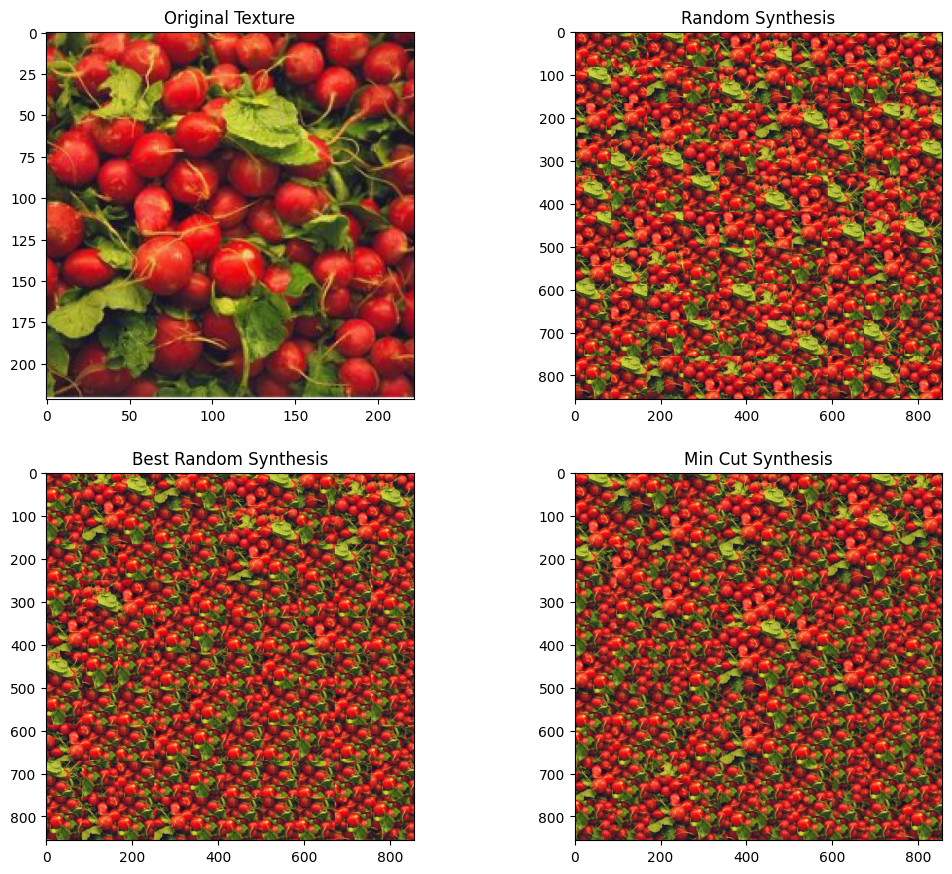

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(texture1)
axs[0][0].title.set_text("Original Texture")

axs[0][1].imshow(random1)
axs[0][1].title.set_text("Random Synthesis")

axs[1][0].imshow(best1)
axs[1][0].title.set_text("Best Random Synthesis")

axs[1][1].imshow(cut1)
axs[1][1].title.set_text("Min Cut Synthesis")

plt.show()

### Test 2
Rocks

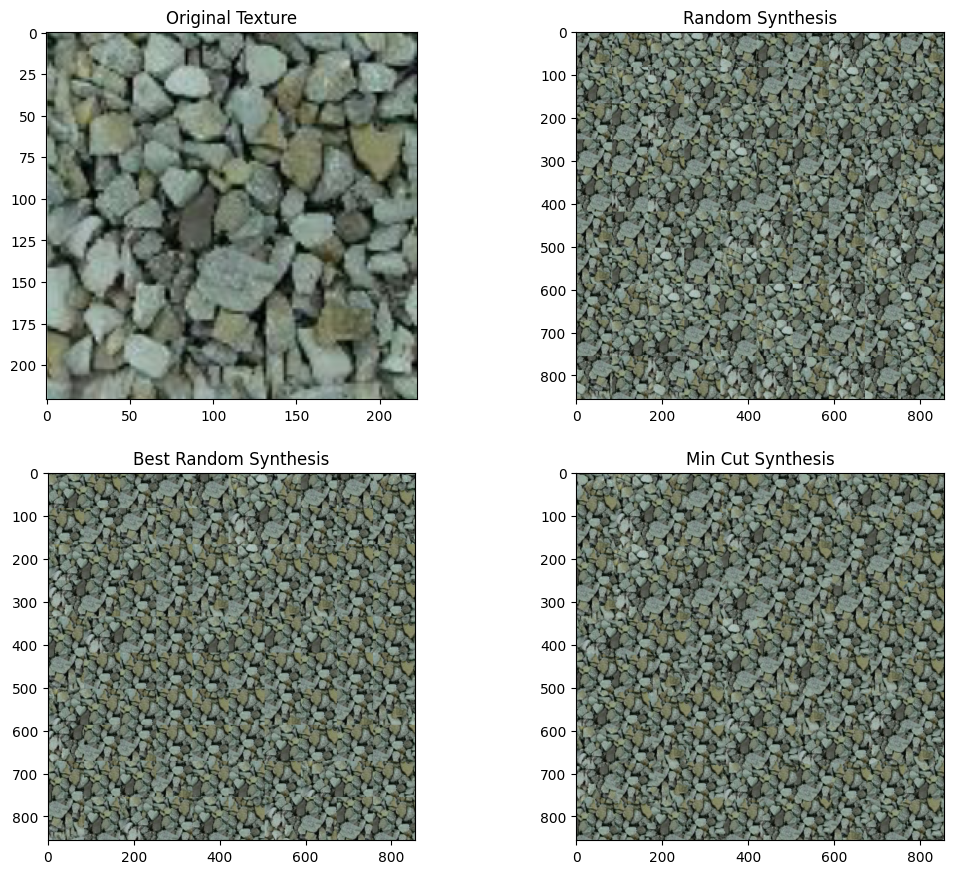

In [10]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(texture2)
axs[0][0].title.set_text("Original Texture")

axs[0][1].imshow(random2)
axs[0][1].title.set_text("Random Synthesis")

axs[1][0].imshow(best2)
axs[1][0].title.set_text("Best Random Synthesis")

axs[1][1].imshow(cut2)
axs[1][1].title.set_text("Min Cut Synthesis")

plt.show()

### Test 3
Yogurt

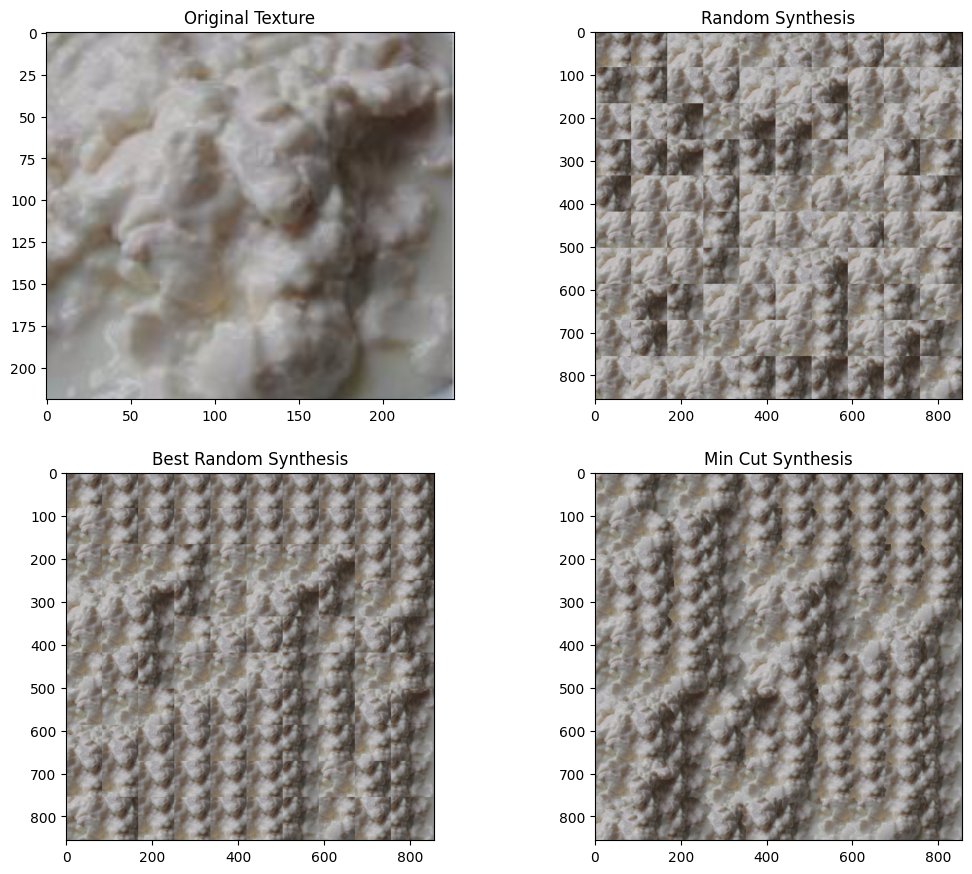

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(texture3)
axs[0][0].title.set_text("Original Texture")

axs[0][1].imshow(random3)
axs[0][1].title.set_text("Random Synthesis")

axs[1][0].imshow(best3)
axs[1][0].title.set_text("Best Random Synthesis")

axs[1][1].imshow(cut3)
axs[1][1].title.set_text("Min Cut Synthesis")

plt.show()

### Test 4
Berry

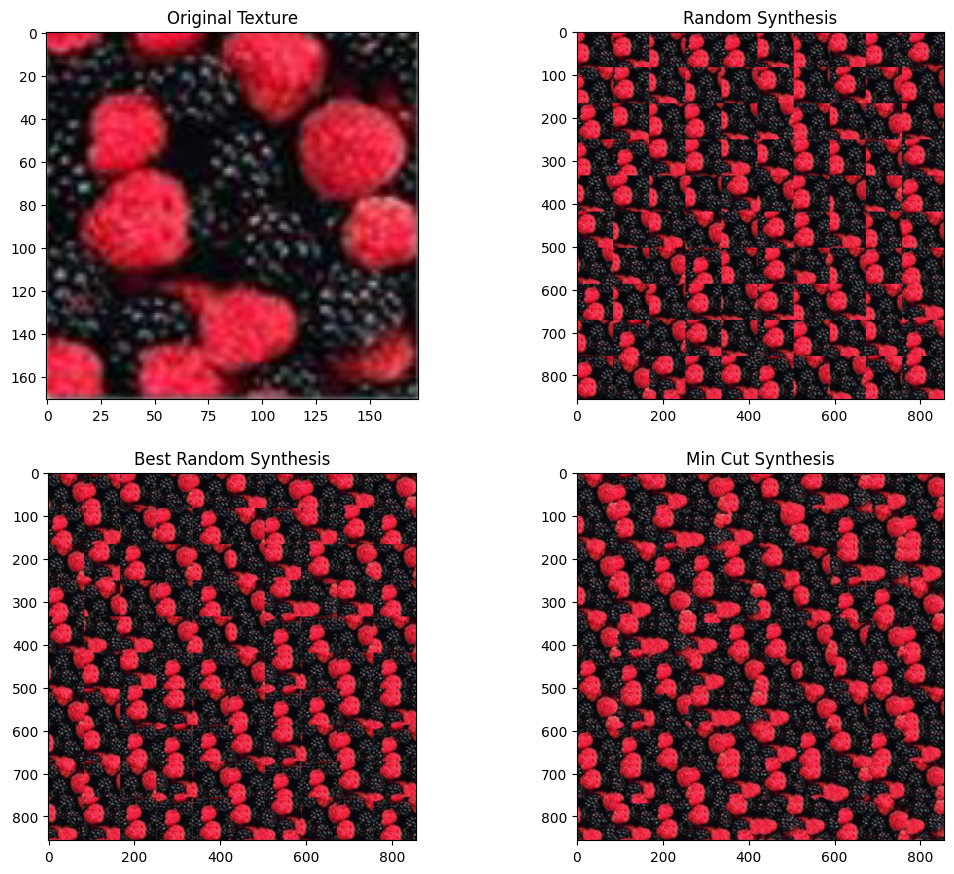

In [12]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 10.5)

axs[0][0].imshow(texture4)
axs[0][0].title.set_text("Original Texture")

axs[0][1].imshow(random4)
axs[0][1].title.set_text("Random Synthesis")

axs[1][0].imshow(best4)
axs[1][0].title.set_text("Best Random Synthesis")

axs[1][1].imshow(cut4)
axs[1][1].title.set_text("Min Cut Synthesis")

plt.show()

__Conclusion:__

As you can see, among all these synthesis which we used in this task, two best random patches and min cut synthesis have more promising results among all synthesis approaches. Among min cut and best random patch, best random patch performs much better in sample images as you can see.